In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [163]:
# Checking the number of mice and how many times each unique mouse id appears

data_df["Mouse ID"].value_counts()

g989    13
l471    10
x773    10
g497    10
j984    10
        ..
o848     1
n482     1
x336     1
v199     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [164]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data_df[data_df.duplicated(["Mouse ID", "Timepoint"],keep = False)]

In [165]:
duplicate_mouse_id= duplicate_mouse["Mouse ID"].unique()

In [166]:
dup_mouse_id=(duplicate_mouse_id[0])


In [167]:
data_df2 = data_df.copy()


In [168]:
data_df2 = (data_df2.loc[data_df["Mouse ID"] != dup_mouse_id,:])

In [169]:
data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [170]:
data_df2["Mouse ID"].value_counts()

l471    10
j365    10
x773    10
a444    10
g497    10
        ..
v199     1
f932     1
t573     1
b447     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [171]:
data_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [172]:
#Summary Stats


In [173]:
reg_groups = data_df2.groupby("Drug Regimen")

In [174]:
group_tumor_mean = reg_groups["Tumor Volume (mm3)"].mean()

In [175]:
group_tumor_med = reg_groups["Tumor Volume (mm3)"].median()

In [176]:
print(group_tumor_med)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [177]:
group_tumor_var =reg_groups["Tumor Volume (mm3)"].var()

In [178]:
group_tumor_std = reg_groups["Tumor Volume (mm3)"].std()

In [179]:
print(group_tumor_std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [180]:
group_tumor_sem = reg_groups["Tumor Volume (mm3)"].sem()

In [181]:
print(group_tumor_sem)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [182]:
df_frame = {"Mean Tumor Volume": group_tumor_mean,
            "Median Tumor Volume": group_tumor_med,
            "Tumor Volume Variance": group_tumor_var,
            "Tumor Volume Std. Dev.": group_tumor_std,
            "Tumor Volume Std. Err.": group_tumor_sem}

In [183]:
sum_stat_df = pd.DataFrame(df_frame)

In [184]:
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [185]:
agg_sum_stat = (reg_groups["Tumor Volume (mm3)"]).agg(func = ['mean','median','var','std','sem'])

In [186]:
agg_sum_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
#bar plot showing total number of measurements taken on each regimen
#get total number of measurements for each regimen
num_measurements = reg_groups["Tumor Volume (mm3)"].unique()


In [188]:
num_measurements


Drug Regimen
Capomulin    [45.0, 43.87849569, 37.61494768, 38.17723195, ...
Ceftamin     [45.0, 46.79525728, 47.37134328, 49.73440359, ...
Infubinol    [45.0, 48.5084684, 51.852437200000004, 52.7778...
Ketapril     [45.0, 47.462891, 49.78341894, 46.628454799999...
Naftisol     [45.0, 45.69670864, 49.79091948, 51.22756565, ...
Placebo      [45.0, 48.71756819, 49.59518129, 53.82797367, ...
Propriva     [45.0, 46.55308986, 47.86737569, 49.53040137, ...
Ramicane     [45.0, 38.82589807, 35.01427146, 34.22399174, ...
Stelasyn     [45.0, 48.95136773, 53.52399007, 55.26558163, ...
Zoniferol    [45.0, 46.11198591, 47.7259374, 49.93472542, 5...
Name: Tumor Volume (mm3), dtype: object

In [189]:
num_measurements2= len(num_measurements[0])

In [190]:
num_measurements2

206

In [191]:
count_meas = reg_groups["Tumor Volume (mm3)"].count()

In [192]:
count_meas


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

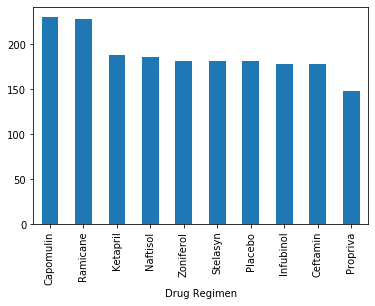

In [193]:
count_meas1 = count_meas.sort_values(ascending = False)
count_graph1 = count_meas1.plot(kind = 'bar')


<BarContainer object of 10 artists>

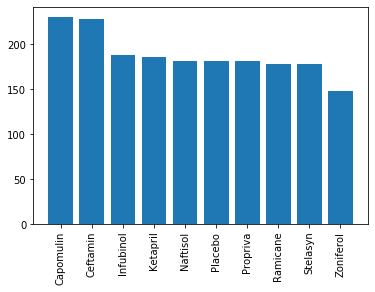

In [197]:
count2 = plt.figure()
x = ["Capomulin","Ceftamin", "Infubinol","Ketapril","Naftisol","Placebo","Propriva", "Ramicane","Stelasyn","Zoniferol"]
ticks = np.arange(len(x))
plt.xticks(ticks,x, rotation = 90)
plt.bar(x,count_meas1)


In [198]:
#pie plots

In [206]:
#get gender distribution
gend_group= data_df2.groupby("Sex")

In [207]:
gend_dist_count = gend_group["Sex"].count()

In [220]:
gend_dist_count =gend_dist_count.sort_values(ascending = False)

In [221]:
gend_tot = ((gend_dist_count[0])+(gend_dist_count[1]))

In [222]:
gend_dist = gend_dist_count/gend_tot

In [223]:
gend_dist

Sex
Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

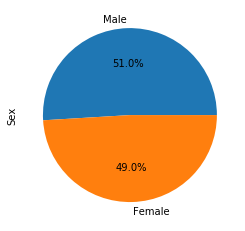

In [237]:
pie_try1 = gend_dist_count.plot(kind = "pie", autopct="%.1f%%")

Text(0, 0.5, 'Sex')

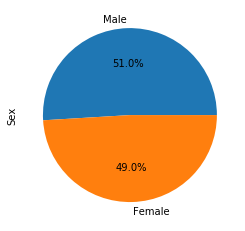

In [259]:
#pie plot using pyplot
pieChart2 = plt.figure()
pieChart2
genders = ["Male", "Female"]
pie2 = plt.pie(gend_dist_count,labels = genders, autopct="%1.1f%%")
plt.ylabel("Sex")